In [1]:
import os
from pathlib import Path
import imutils
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import torch

In [21]:
print('쿠다 사용 가능 여부 : ',torch.cuda.is_available())
print('PyTorch가 인식한 CUDA 버전 출력 : ',torch.version.cuda)  
print('CUDA 가속 가능 여부 : ',torch.cuda.is_available())  
print('GPU 개수 출력 : ',torch.cuda.device_count())  
print('Device 이름 : ',torch.cuda.get_device_name(0)) 

쿠다 사용 가능 여부 :  True
PyTorch가 인식한 CUDA 버전 출력 :  12.8
CUDA 가속 가능 여부 :  True
GPU 개수 출력 :  1
Device 이름 :  NVIDIA GeForce GTX 1050 Ti


In [4]:
from ultralytics import YOLO

# Load a pretrained YOLO11n model
model = YOLO("./model/yolo11/Seg/yolo11n-seg.pt")

results = model.predict(
    source="https://ultralytics.com/images/bus.jpg",
    conf=0.5,
    imgsz=(640, 480),
    device='cuda:0',
    max_det=10,
    retina_masks=True
)
type(results[0])


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 c:\Users\user\Mini\mini_project\bus.jpg: 640x480 3 persons, 1 bus, 34.4ms
Speed: 3.2ms preprocess, 34.4ms inference, 11.4ms postprocess per image at shape (1, 3, 640, 480)


ultralytics.engine.results.Results

In [23]:
len(results[0].masks.data)

4

In [24]:
labels = results[0].names  # 모델이 인식한 객체 클래스 이름
box_label = results[0].boxes.cls.cpu().numpy()  # 감지된 객체의 클래스 인덱스
print(f"객체 레이블: {labels[int(box_label[0])]}")  # 해당 마스크의 레이블 출력

객체 레이블: bus


In [25]:
conf = results[0].boxes.conf.cpu().numpy()
print(f'정확도{conf[0]}')

정확도0.8985286951065063


In [26]:
boxes = results[0].boxes.xyxy.cpu().numpy()
print(boxes[1])

[     670.14      390.57      809.55      875.29]


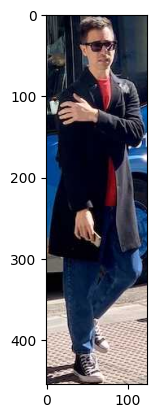

In [27]:
img_path = "https://ultralytics.com/images/bus.jpg"
res = requests.get(img_path)
img_arr = np.asarray(bytearray(res.content), dtype=np.uint8)
img_full = cv2.imdecode(img_arr, cv2.IMREAD_COLOR)
x1, y1, x2, y2 = boxes[3].astype(int)
img = img_full[y1:y2,x1:x2]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

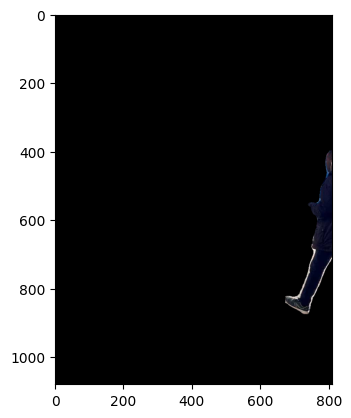

In [28]:
img_path = "https://ultralytics.com/images/bus.jpg"
response = requests.get(img_path)
image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
mask = results[0].masks.data[1].cpu().numpy()

mask = (mask * 255).astype(np.uint8)
masked_image = cv2.bitwise_and(image, image, mask=mask)
img = cv2.cvtColor(masked_image,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

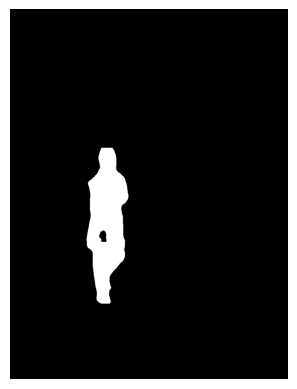

In [29]:
# Visualize the first mask from the results
if results[0].masks is not None:
	mask = results[0].masks.data[3].cpu().numpy()
	plt.imshow(mask, cmap='gray')
	plt.axis('off')
	plt.show()
else:
	print("No masks found in results.")

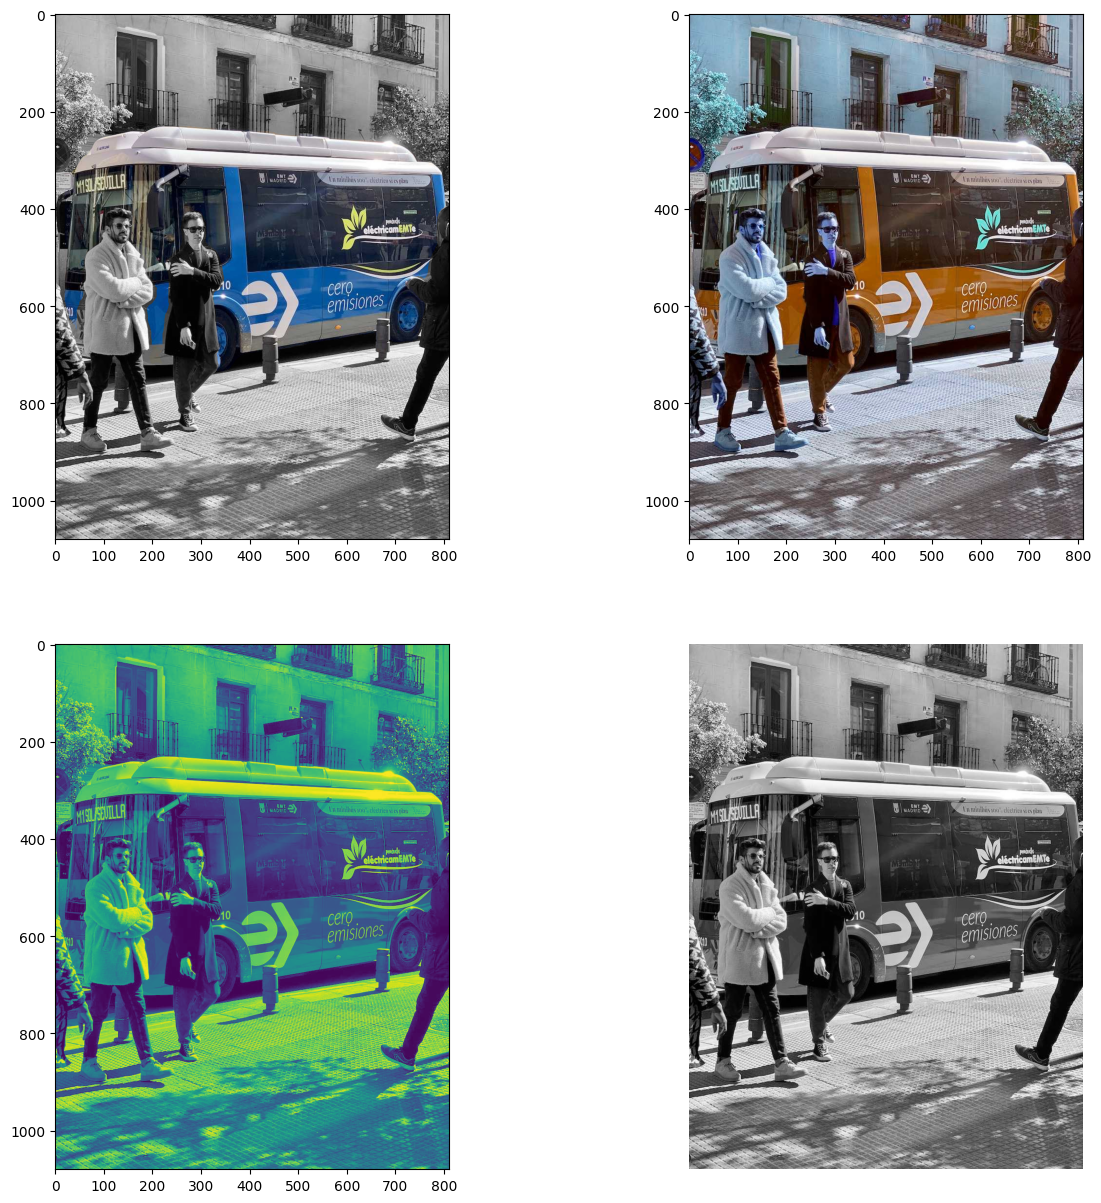

In [32]:
# 이미지 다운로드 및 디코딩
img_path = "https://ultralytics.com/images/bus.jpg"
response = requests.get(img_path)
image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# 마스크 가져오기
mask = results[0].masks.data[0].cpu().numpy()
mask = (mask * 255).astype(np.uint8)

# 원본을 흑백(그레이스케일)으로 변환
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 흑백 이미지를 다시 3채널로 변환 (컬러 유지 가능하도록)
gray_image_3ch = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)

# 마스크 적용: 마스크 부분은 원본 컬러, 나머지는 흑백
masked_image = np.where(mask[:, :, None] > 0, image, gray_image_3ch)

# RGB 변환 및 출력
img = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.imshow(img)

plt.subplot(222)
plt.imshow(image)

plt.subplot(223)
plt.imshow(gray_image)

plt.subplot(224)
plt.imshow(gray_image_3ch)

plt.axis("off")
plt.show()